In [1]:
%pip install yfinance  requests


In [2]:
import yfinance as yf
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Bitcoin data

In [3]:
def get_bitcoin_price():
    url = "https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd"
    response = requests.get(url)
    data = response.json()
    return data["bitcoin"]["usd"]

print("Bitcoin Price:","$",get_bitcoin_price())

Bitcoin Price: $ 87540


In [4]:
import yfinance as yf
import pandas as pd

# Bitcoin Ticker
btc = yf.Ticker("BTC-USD")

# List of periods want to fetch
periods = ['3mo', '1y', '5y']

# Dictionary to store DataFrames for each period
btc_data = {}

for period in periods:
    # Fetch historical data for the period
    hist = btc.history(period=period)
    btc_data[period] = hist
    print(f"\n===== Bitcoin Data for period: {period} =====")
    print(hist.head())  # Show the first few rows of each period's data




===== Bitcoin Data for period: 3mo =====
                                   Open          High           Low  \
Date                                                                  
2024-12-27 00:00:00+00:00  95704.976562  97294.843750  93310.742188   
2024-12-28 00:00:00+00:00  94160.187500  95525.898438  94014.289062   
2024-12-29 00:00:00+00:00  95174.054688  95174.875000  92881.789062   
2024-12-30 00:00:00+00:00  93527.195312  94903.320312  91317.132812   
2024-12-31 00:00:00+00:00  92643.250000  96090.601562  91914.031250   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2024-12-27 00:00:00+00:00  94164.859375  52419934565        0.0           0.0  
2024-12-28 00:00:00+00:00  95163.929688  24107436185        0.0           0.0  
2024-12-29 00:00:00+00:00  93530.226562  29635885267        0.0           0.0  
2024-12-30 00:00:00+00:00  92643.210938  56188003691        

In [5]:
for period in periods:
    btc_data[period].to_csv(f'BTC_USD_{period}.csv')


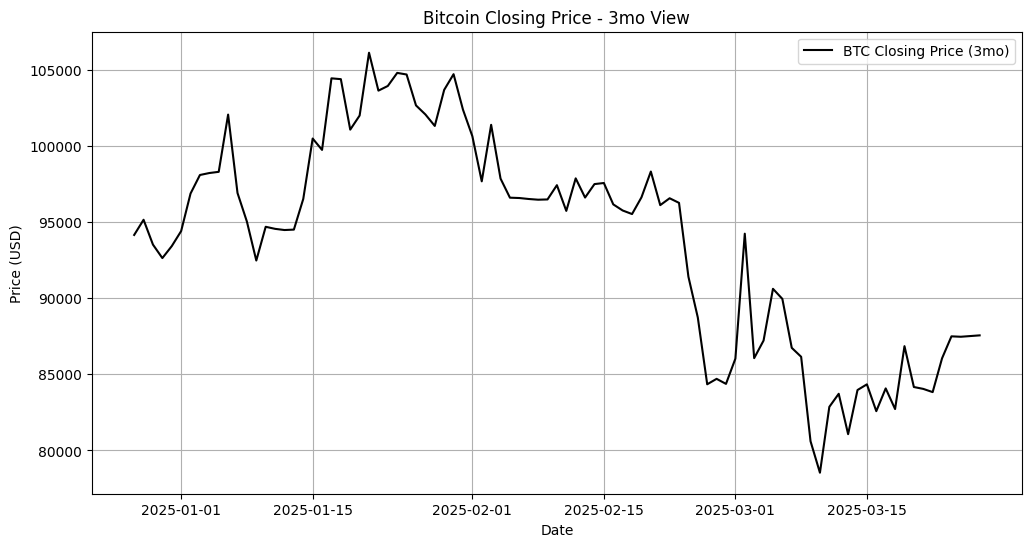

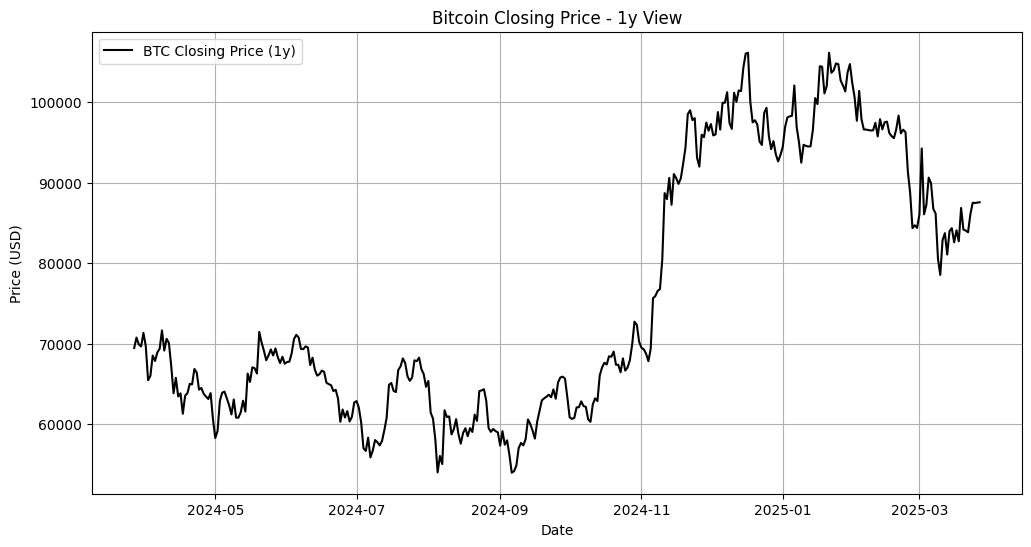

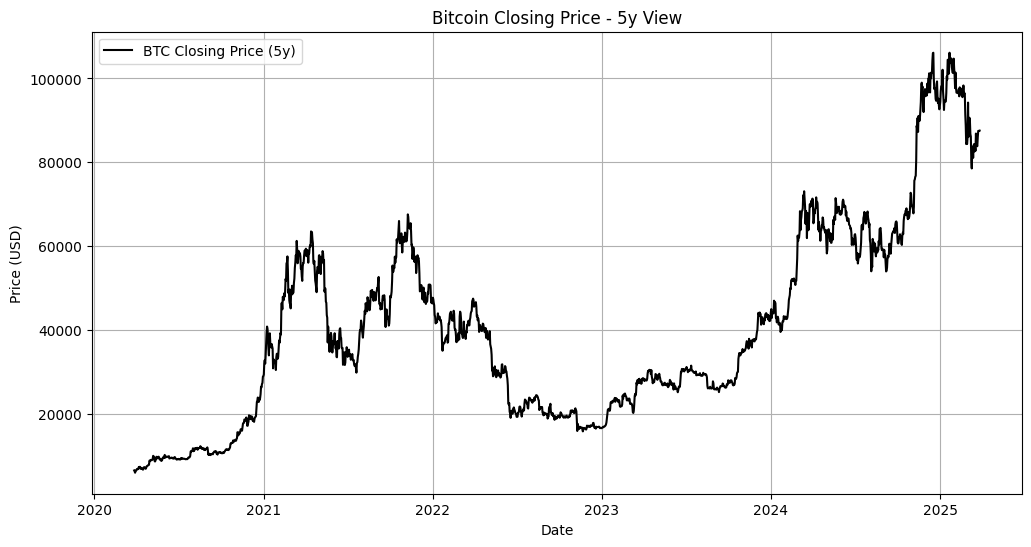

In [6]:
plot_periods = [ "3mo", "1y", "5y"]

for period in plot_periods:
    df = pd.read_csv(f'BTC_USD_{period}.csv', index_col=0, parse_dates=True)

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label=f'BTC Closing Price ({period})', color='black')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'Bitcoin Closing Price - {period} View')
    plt.legend()
    plt.grid(True)
    plt.show()



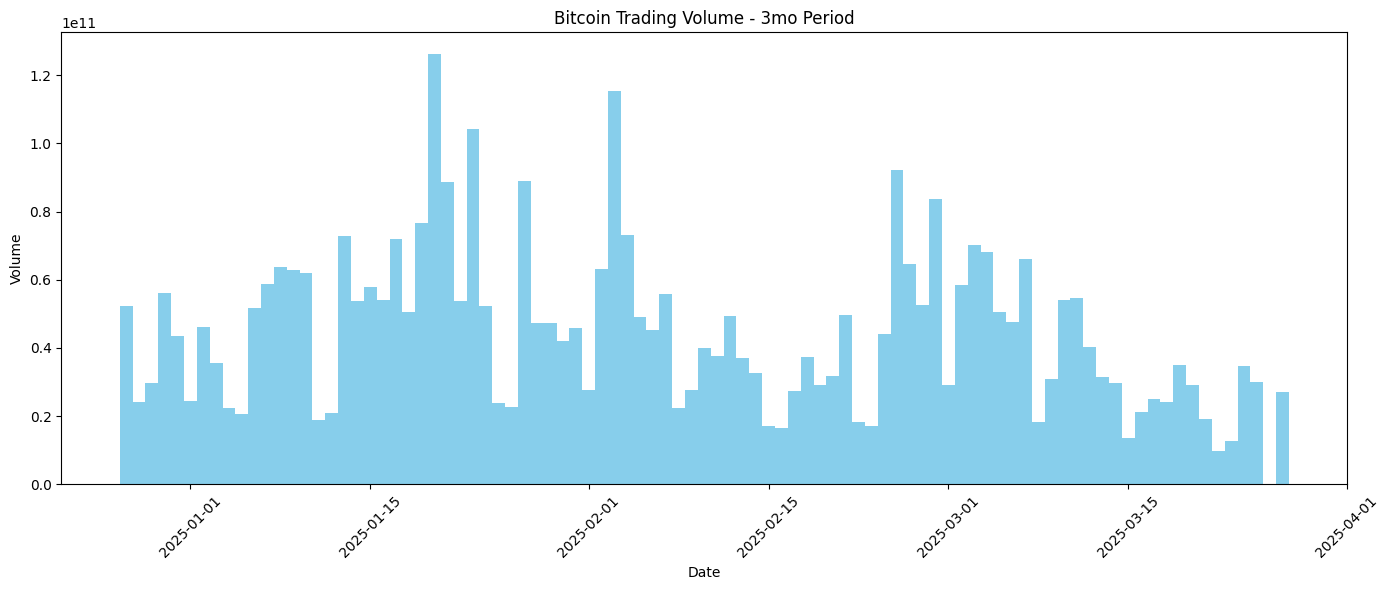

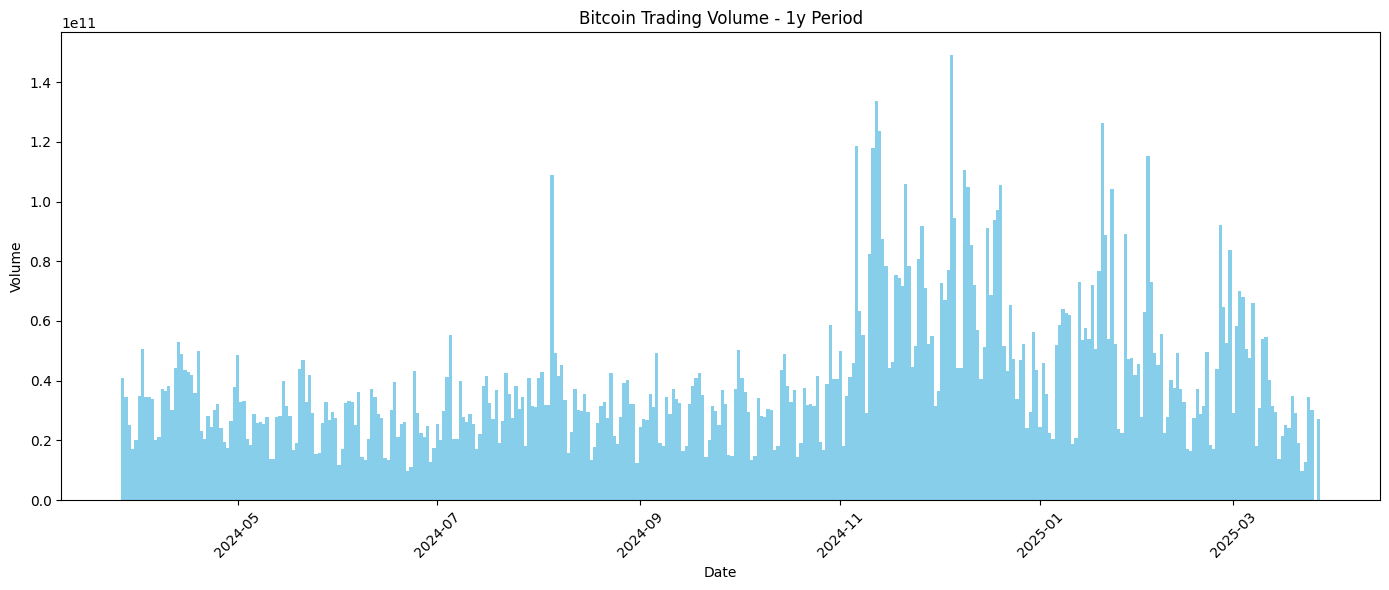

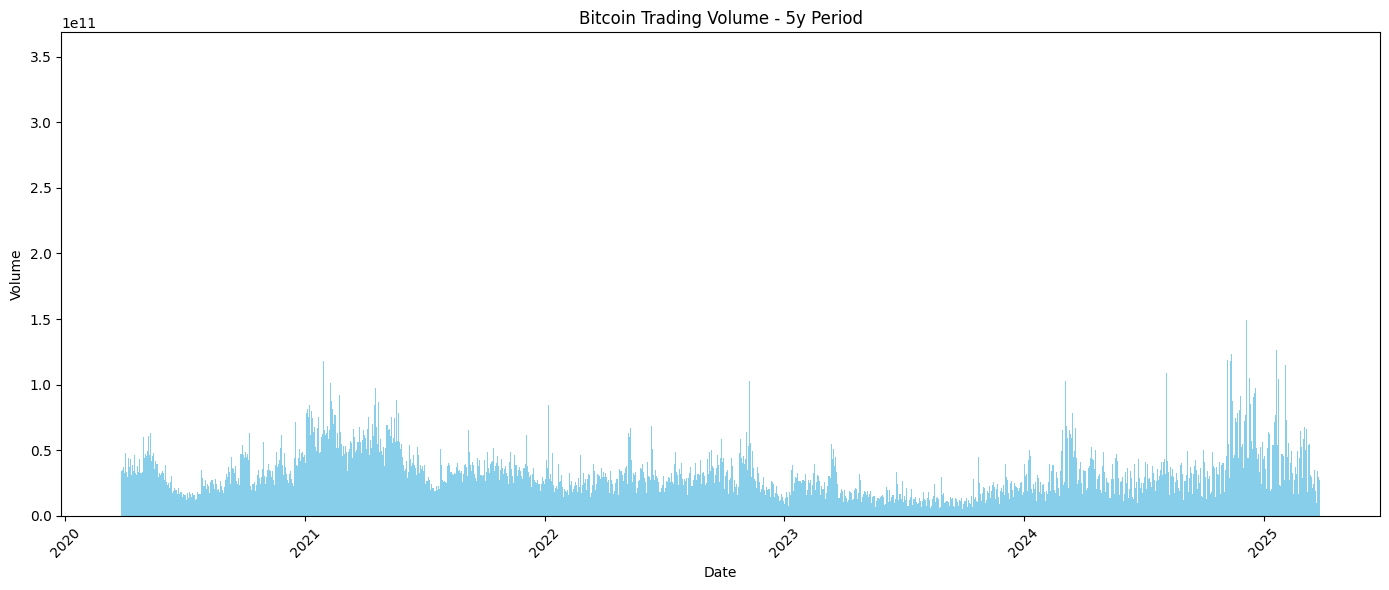

In [12]:
for period in periods:
    # Load the CSV file for each period
    df = pd.read_csv(f'BTC_USD_{period}.csv', index_col=0, parse_dates=True)

    # Plot Volume as a bar graph
    plt.figure(figsize=(14, 6))
    plt.bar(df.index, df['Volume'], color='skyblue', width=1)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(f'Bitcoin Trading Volume - {period} Period')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Prediction model for 3 months

In [8]:
df_1mo = pd.read_csv('BTC_USD_3mo.csv', index_col=0, parse_dates=True)
df_1mo.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-27 00:00:00+00:00,95704.976562,97294.843750,93310.742188,94164.859375,52419934565,0.0,0.0
2024-12-28 00:00:00+00:00,94160.187500,95525.898438,94014.289062,95163.929688,24107436185,0.0,0.0
2024-12-29 00:00:00+00:00,95174.054688,95174.875000,92881.789062,93530.226562,29635885267,0.0,0.0
2024-12-30 00:00:00+00:00,93527.195312,94903.320312,91317.132812,92643.210938,56188003691,0.0,0.0
2024-12-31 00:00:00+00:00,92643.250000,96090.601562,91914.031250,93429.203125,43625106843,0.0,0.0


In [9]:
df_1mo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-27 00:00:00+00:00 to 2025-03-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          90 non-null     float64
 1   High          90 non-null     float64
 2   Low           90 non-null     float64
 3   Close         90 non-null     float64
 4   Volume        90 non-null     int64  
 5   Dividends     90 non-null     float64
 6   Stock Splits  90 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.6 KB


In [13]:
df_1mo.drop(['Dividends', 'Stock Splits', 'High','Open','Low'], axis=1, inplace=True)
df_1mo.head()

,Close,Volume
Date,,
2024-12-27 00:00:00+00:00,94164.859375,52419934565
2024-12-28 00:00:00+00:00,95163.929688,24107436185
2024-12-29 00:00:00+00:00,93530.226562,29635885267
2024-12-30 00:00:00+00:00,92643.210938,56188003691
2024-12-31 00:00:00+00:00,93429.203125,43625106843
